In [47]:
import pandas as pd

In [48]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/archive/n_movies.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [50]:
df.describe()


,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [51]:

df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [52]:
df['rating'] = df['rating'].astype(float)  # تحويل للـ float إذا كان string
print("Average rating:", df['rating'].mean())
print("Top Rated:\n", df[df['rating'] == df['rating'].max()])


Average rating: 6.764515027322403
Top Rated:
                 title         year certificate duration  \
9444  BoJack Horseman  (2014–2020)       TV-MA   26 min   

                         genre  rating  \
9444  Animation, Comedy, Drama     9.9   

                                      description  \
9444  BoJack reconnects with faces from his past.   

                                                  stars   votes  
9444  ['Amy Winfrey', '| ', '    Stars:', 'Will Arne...  16,066  


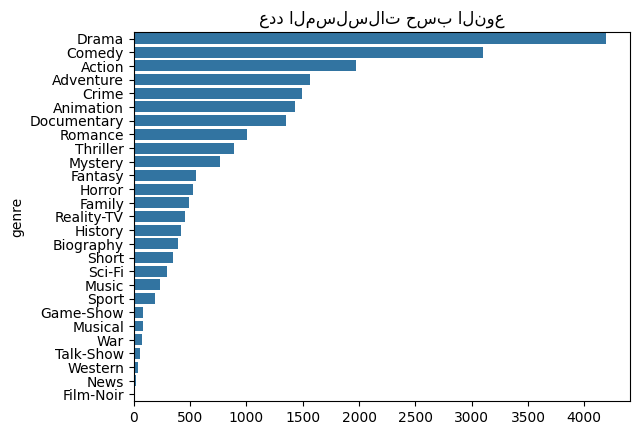

In [53]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# تحليل genre
all_genres = df['genre'].str.split(', ').explode()
genre_counts = all_genres.value_counts()

# رسم
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("عدد المسلسلات حسب النوع")
plt.show()


In [54]:
#import numpy as np
#df['duration'] = df['duration'].replace(np.nan , '0')
df['duration'] = df['duration'].fillna('0')
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(int)
print(df[['title', 'duration_minutes']])


                       title  duration_minutes
0                  Cobra Kai                30
1                  The Crown                58
2           Better Call Saul                46
3              Devil in Ohio               356
4     Cyberpunk: Edgerunners                24
...                      ...               ...
9952          The Imperfects                45
9953        The Walking Dead                44
9954               The Crown                58
9955            Supernatural                44
9956           Devil in Ohio               356

[9957 rows x 2 columns]


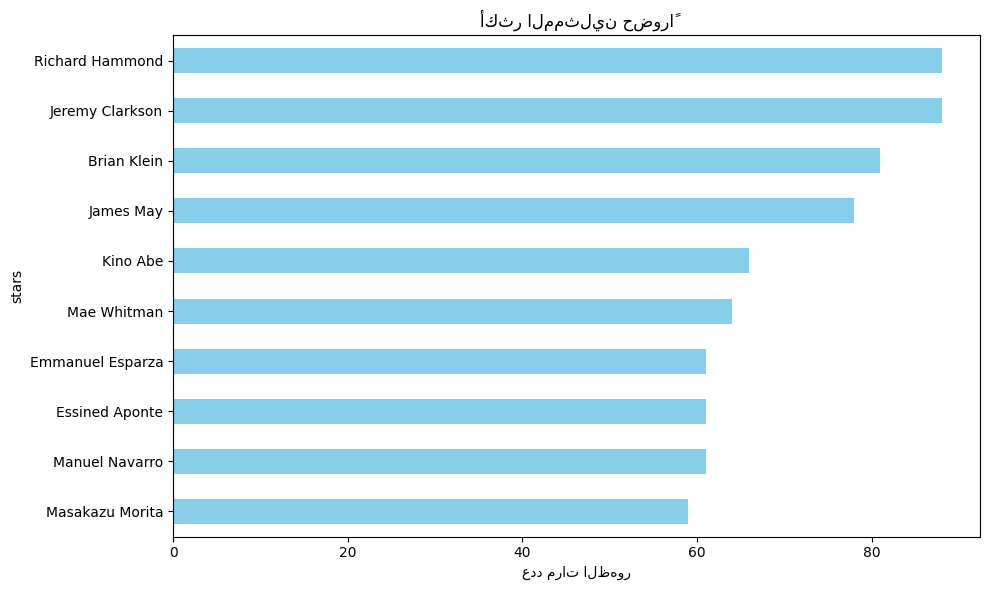

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# التنقية المحسّنة
all_stars = df['stars'] \
    .str.replace(r"[\[\]']", "", regex=True) \
    .str.split(',') \
    .explode() \
    .dropna() \
    .str.strip() \
    .replace(r'^(Stars?:|["|])$', '', regex=True) \
    .replace('', pd.NA) \
    .dropna()
#print(all_stars)
# حساب أكثر الممثلين
top_stars = all_stars.value_counts().head(10)
#print(top_stars.value_counts)
# الرسم
plt.figure(figsize=(10, 6))
top_stars.plot(kind='barh', title='أكثر الممثلين حضوراً', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("عدد مرات الظهور")
plt.tight_layout()
plt.show()

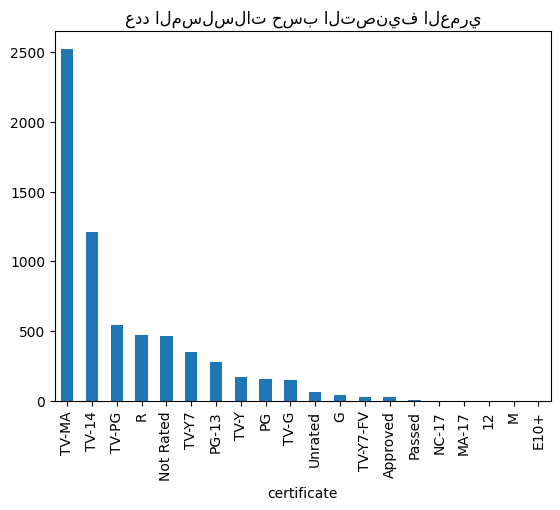

In [56]:
 df['certificate'].value_counts().plot(kind='bar', title="عدد المسلسلات حسب التصنيف العمري")
plt.show()


In [57]:
df.head(3)

,title,year,certificate,duration,genre,rating,description,stars,votes,duration_minutes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",30
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",58
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",46


In [58]:
df['certificate'].unique()

array(['TV-14', 'TV-MA', 'NC-17', 'R', 'PG-13', nan, 'TV-PG', 'PG',
       'Not Rated', 'TV-Y7-FV', 'Approved', 'G', 'Unrated', 'TV-G',
       'TV-Y7', 'MA-17', 'TV-Y', 'Passed', '12', 'M', 'E10+'],
      dtype=object)

In [59]:
cert_age = {
    'TV-Y': 3,
    'TV-Y7': 7,
    'TV-Y7-FV': 7,
    'TV-G': 6,
    'G': 6,
    'TV-PG': 10,
    'PG': 10,
    'PG-13': 13,
    '12': 12,
    'TV-14': 14,
    'R': 17,
    'TV-MA': 18,
    'MA-17': 17,
    'NC-17': 18,
    'M': 17,
    'E10+': 10,
    'Approved': 13,
    'Passed': 13,
    'Unrated': -1,
    'Not Rated': -1
}

df['certificate'] = df['certificate'].replace(cert_age).fillna(-1).astype(int)
def classify_age_group(age):
    if age == -1:
        return 'Unknown'
    elif age <= 10:
        return 'Kids'
    elif age <= 14:
        return 'Teens'
    else:
        return 'Adults'

df['age_group'] = df['certificate'].apply(classify_age_group)

print(df['age_group'].head(5))

0     Teens
1    Adults
2    Adults
3    Adults
4    Adults
Name: age_group, dtype: object


/tmp/ipython-input-59-3252708189.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['certificate'] = df['certificate'].replace(cert_age).fillna(-1).astype(int)


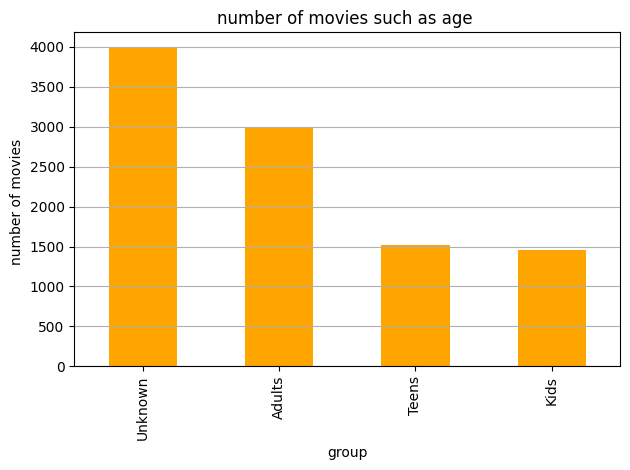

In [60]:
df['age_group'].value_counts().plot(kind='bar', title='number of movies such as age ', color='orange')
plt.xlabel("group")
plt.ylabel("number of movies ")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [61]:
# here we have probleme of th 'Unknown' have a huge part on diagrame we need to resize age group

In [62]:
print(df['certificate'].value_counts(dropna=False))


certificate
-1     3983
 18    2524
 14    1209
 10     703
 17     474
 7      380
 13     314
 6      194
 3      175
 12       1
Name: count, dtype: int64


In [63]:
moyen_age = df[df['certificate'] != -1]['certificate'].mean()
df.loc[df['certificate'] == -1, 'certificate'] = moyen_age
def classify_age_group(age):
    if age == -1:
        return 'Unknown'
    elif age <= 10:
        return 'Kids'
    elif age <= 14:
        return 'Teens'
    else:
        return 'Adults'

df['age_groupv1'] = df['certificate'].apply(classify_age_group)

print(df['age_groupv1'].head(5))
df['certificate'] = df['certificate'].astype(int)
print(df['certificate'].unique())

0     Teens
1    Adults
2    Adults
3    Adults
4    Adults
Name: age_groupv1, dtype: object
[14 18 17 13 10  7  6  3 12]


/tmp/ipython-input-63-760569639.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.377134248409776' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['certificate'] == -1, 'certificate'] = moyen_age


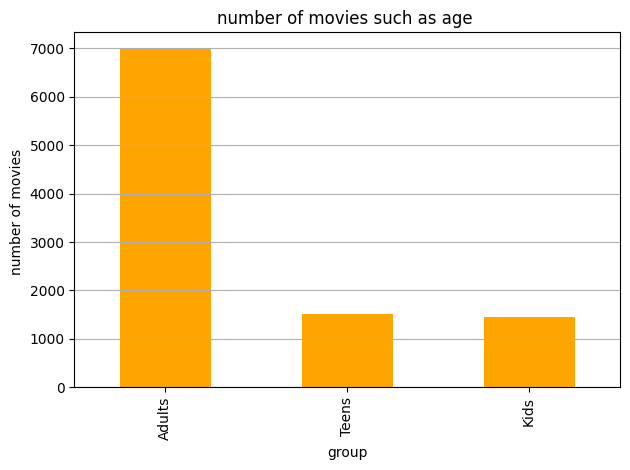

In [64]:
df['age_groupv1'].value_counts().plot(kind='bar', title='number of movies such as age ', color='orange')
plt.xlabel("group")
plt.ylabel("number of movies ")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

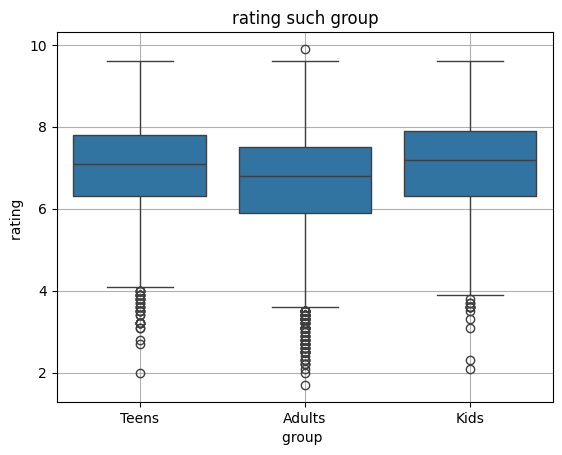

In [65]:
sns.boxplot(x='age_groupv1', y='rating', data=df)
plt.title("rating such group")
plt.xlabel("group ")
plt.ylabel("rating ")
plt.grid(True)
plt.show()


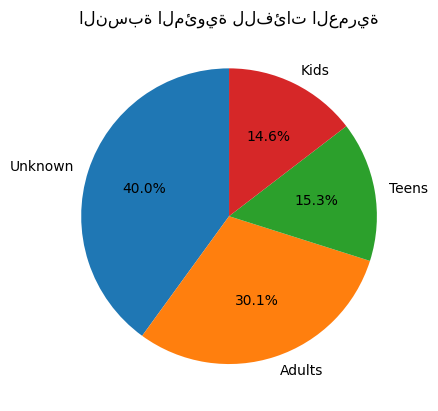

In [66]:
df['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("النسبة المئوية للفئات العمرية")
plt.ylabel("")  # نحدف العنوان الجانبي
plt.show()


In [67]:
print(df.isnull().sum())  # Nan values


title                  0
year                 527
certificate            0
duration               0
genre                 73
rating              1173
description            0
stars                  0
votes               1173
duration_minutes       0
age_group              0
age_groupv1            0
dtype: int64


In [78]:
df['votes'].dtype

dtype('O')

In [90]:
# drop gendre rows of Nan value
df = df.dropna(subset=['genre'])
# replace Nan votes with median
df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=False)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['votes'] = df['votes'].fillna(df['votes'].median()).astype(int)
# replace Nan rating with mean
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [91]:
print(df.isnull().sum())

title                 0
year                494
certificate           0
duration              0
genre                 0
rating                0
description           0
stars                 0
votes                 0
duration_minutes      0
age_group             0
age_groupv1           0
dtype: int64


In [92]:
df.head(2)

,title,year,certificate,duration,genre,rating,description,stars,votes,duration_minutes,age_group,age_groupv1
0,Cobra Kai,(2018– ),14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,30,Teens,Teens
1,The Crown,(2016– ),18,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885,58,Adults,Adults


In [98]:
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')

In [99]:
df.head(2)

,title,year,certificate,duration,genre,rating,description,stars,votes,duration_minutes,age_group,age_groupv1
0,Cobra Kai,(2018– ),14,30 min,Action,8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,30,Teens,Teens
0,Cobra Kai,(2018– ),14,30 min,Comedy,8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,30,Teens,Teens


In [104]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes', 'duration_minutes', 'age_group',
       'age_groupv1'],
      dtype='object')

In [107]:
exported_data = df[['title','certificate','duration_minutes','genre','age_group','rating','votes']]

In [113]:
import os

# Define the directory path
save_directory = '/content/drive/MyDrive/archive'

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)
    print(f"Directory '{save_directory}' created.")
else:
    print(f"Directory '{save_directory}' already exists.")

# Save the DataFrame to a CSV file in the specified directory
exported_data.to_csv(os.path.join(save_directory, 'cleaned_netflix.csv'), index=False)
print("DataFrame successfully saved to 'cleaned_netflix.csv'")

Directory '/content/drive/MyDrive/archive' already exists.
DataFrame successfully saved to 'cleaned_netflix.csv'


In [4]:
from getpass import getpass
token = getpass("Paste your GitHub token: ")

Paste your GitHub token: ··········


In [5]:
!git push https://{token}@github.com/abdelali-elhachady-dev/DataAnalytics.git



fatal: not a git repository (or any of the parent directories): .git
